In [1]:
## Imports for Functions

import os
import pandas as pd
import numpy as np
import random
import time
import datetime

# For Plotting
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

In [2]:
## Customer Profiles Table
def generate_customer_profiles_table(n_customers, random_state = 0):
    
    np.random.seed(random_state)
        
    customer_id_properties=[]
    
    # Generate customer properties from random distributions 
    for customer_id in range(n_customers):
        
        x_customer_id = np.random.uniform(0,100)
        y_customer_id = np.random.uniform(0,100)
        
        mean_amount = np.random.uniform(5,2000) # Arbitrary (but sensible) value 
        std_amount = mean_amount/2 # Arbitrary (but sensible) value
        
        mean_nb_tx_per_day = np.random.uniform(0,10) # Arbitrary (but sensible) value 
        
        customer_id_properties.append([customer_id,
                                       x_customer_id,
                                       y_customer_id,
                                       mean_amount,
                                       std_amount,
                                       mean_nb_tx_per_day])
        
    customer_profiles_table = pd.DataFrame(customer_id_properties, columns=['customer_id',
                                                                            'x_customer_id',
                                                                            'y_customer_id',
                                                                            'mean_amount',
                                                                            'std_amount',
                                                                            'mean_nb_tx_per_day'])
    
    return customer_profiles_table

In [3]:
n_customers = 5
customer_profiles_table = generate_customer_profiles_table(n_customers, random_state = 0)
customer_profiles_table

,customer_id,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day
0,0,54.881350,71.518937,1207.512935,603.756468,5.448832
1,1,42.365480,64.589411,877.986486,438.993243,8.917730
2,2,96.366276,38.344152,1584.491451,792.245725,5.288949
3,3,56.804456,92.559664,146.716936,73.358468,0.871293
4,4,2.021840,83.261985,1557.422718,778.711359,8.700121


In [4]:
## Terminal Profiles Table

def generate_terminal_profiles_table(n_terminals, random_state=0):
    
    np.random.seed(random_state)
        
    terminal_id_properties=[]
    
    # Generate terminal properties from random distributions 
    for terminal_id in range(n_terminals):
        
        x_terminal_id = np.random.uniform(0,100)
        y_terminal_id = np.random.uniform(0,100)
        
        terminal_id_properties.append([terminal_id,
                                       x_terminal_id,
                                       y_terminal_id])
                                       
    terminal_profiles_table = pd.DataFrame(terminal_id_properties, columns = ['terminal_id',
                                                                              'x_terminal_id',
                                                                              'y_terminal_id'])
    
    return terminal_profiles_table

In [5]:
n_terminals = 5
terminal_profiles_table = generate_terminal_profiles_table(n_terminals, random_state = 0)
terminal_profiles_table

,terminal_id,x_terminal_id,y_terminal_id
0,0,54.881350,71.518937
1,1,60.276338,54.488318
2,2,42.365480,64.589411
3,3,43.758721,89.177300
4,4,96.366276,38.344152


In [6]:
## List of Terminals within Radius

def get_list_terminals_within_radius(customer_profile, x_y_terminals, r):
    
    # Use numpy arrays in the following to speed up computations
    
    # Location (x,y) of customer as numpy array
    x_y_customer = customer_profile[['x_customer_id','y_customer_id']].values.astype(float)
    
    # Squared difference in coordinates between customer and terminal locations
    squared_diff_x_y = np.square(x_y_customer - x_y_terminals)
    
    # Sum along rows and compute squared root to get distance
    dist_x_y = np.sqrt(np.sum(squared_diff_x_y, axis=1))
    
    # Get the indices of terminals which are at a distance less than r
    available_terminals = list(np.where(dist_x_y<r)[0])
    
    # Return the list of terminal IDs
    return available_terminals
    

In [7]:
# We first get the geographical locations of all terminals as a numpy array
x_y_terminals = terminal_profiles_table[['x_terminal_id', 'y_terminal_id']].values.astype(float)

# And get the list of terminals within radius of 50 for the last customer
get_list_terminals_within_radius(customer_profiles_table.iloc[4], x_y_terminals = x_y_terminals, r=50)

[2, 3]

In [8]:
terminal_profiles_table

,terminal_id,x_terminal_id,y_terminal_id
0,0,54.881350,71.518937
1,1,60.276338,54.488318
2,2,42.365480,64.589411
3,3,43.758721,89.177300
4,4,96.366276,38.344152


In [9]:
%%capture

terminals_available_to_customer_fig, ax = plt.subplots(figsize=(5,5))

# Plot locations of terminals
ax.scatter(terminal_profiles_table.x_terminal_id.values,
            terminal_profiles_table.y_terminal_id.values,
            color='blue', 
            label = 'Locations of terminals')

# Plot location of the last customer
customer_id=4
ax.scatter(customer_profiles_table.iloc[customer_id].x_customer_id,
            customer_profiles_table.iloc[customer_id].y_customer_id,
            color='red',
            label="Location of last customer")

ax.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))

# Plot the region within a radius of 50 of the last customer
circ = plt.Circle((customer_profiles_table.iloc[customer_id].x_customer_id,
                    customer_profiles_table.iloc[customer_id].y_customer_id),
                    radius=50,
                    color='g',
                    alpha=0.2)
ax.add_patch(circ)

fontsize=15

ax.set_title("Green circle: \n Terminals within a radius of 50 \n of the last customer")
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])
    
ax.set_xlabel('x_terminal_id', fontsize=fontsize)
ax.set_ylabel('y_terminal_id', fontsize=fontsize)

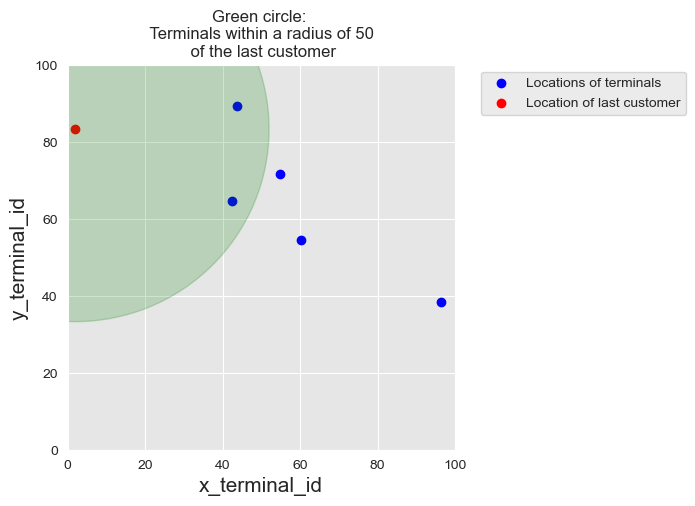

In [10]:
terminals_available_to_customer_fig # type: ignore

In [11]:
## Create New Column in Customer Profiles Table for Available Terminals

customer_profiles_table['available_terminals'] = customer_profiles_table\
    .apply(lambda x : get_list_terminals_within_radius(x, x_y_terminals = x_y_terminals,
                                                       r=50), axis=1)
customer_profiles_table

,customer_id,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals
0,0,54.881350,71.518937,1207.512935,603.756468,5.448832,"[0, 1, 2, 3]"
1,1,42.365480,64.589411,877.986486,438.993243,8.917730,"[0, 1, 2, 3]"
2,2,96.366276,38.344152,1584.491451,792.245725,5.288949,"[1, 4]"
3,3,56.804456,92.559664,146.716936,73.358468,0.871293,"[0, 1, 2, 3]"
4,4,2.021840,83.261985,1557.422718,778.711359,8.700121,"[2, 3]"


In [12]:
## Transactions Table

def generate_transactions_table(customer_profile, start_date = "2023-12-01", nb_days = 10):
    
    customer_transactions = []
    
    random.seed(int(customer_profile.customer_id))
    np.random.seed(int(customer_profile.customer_id))
    
    # For all days
    for day in range(nb_days):
        
        # Random number of transactions for that day 
        nb_tx = np.random.poisson(customer_profile.mean_nb_tx_per_day)
        
        # If nb_tx positive, let us generate transactions
        if nb_tx>0:
            
            for tx in range(nb_tx):
                
                # Time of transaction: Around noon, std 20000 seconds. This choice aims at simulating the fact that most transactions occur during the day.
                time_tx = int(np.random.normal(86400/2, 20000))
                
                # If transaction time between 0 and 86400, let us keep it, otherwise, let us discard it
                if (time_tx>0) and (time_tx<86400):
                    
                    # Amount is drawn from a normal distribution  
                    amount = np.random.normal(customer_profile.mean_amount, customer_profile.std_amount)
                    
                    # If amount negative, draw from a uniform distribution
                    if amount<0:
                        amount = np.random.uniform(0,customer_profile.mean_amount*2)
                    
                    amount = np.round(amount,decimals=2)
                    amount = '{:.2f}'.format(amount)
                    
                    if len(customer_profile.available_terminals)>0:
                        
                        terminal_id = random.choice(customer_profile.available_terminals)
                    
                        customer_transactions.append([time_tx + day * 86400, day, customer_profile.customer_id, terminal_id, float(amount)])
            
    customer_transactions = pd.DataFrame(customer_transactions, columns = ['tx_time_seconds',
                                                                           'tx_time_days',
                                                                           'customer_id',
                                                                           'terminal_id',
                                                                           'tx_amount'])
    
    if len(customer_transactions)>0:
        customer_transactions['tx_datetime'] = pd.to_datetime(customer_transactions["tx_time_seconds"],
                                                              unit='s', origin=start_date)
        customer_transactions = customer_transactions[['tx_datetime',
                                                       'customer_id',
                                                       'terminal_id',
                                                       'tx_amount',
                                                       'tx_time_seconds',
                                                       'tx_time_days']]
    
    return customer_transactions

In [13]:
transaction_table_customer_0 = generate_transactions_table(customer_profiles_table.iloc[0],
                                                           start_date = "2023-12-01",
                                                           nb_days = 5)
transaction_table_customer_0 = transaction_table_customer_0.style.set_caption('Customer Transactions')
transaction_table_customer_0

,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days
0,2023-12-01 18:00:16,0,3,1499.920000,64816,0
1,2023-12-01 15:13:02,0,3,1097.880000,54782,0
2,2023-12-01 19:50:04,0,0,981.420000,71404,0
3,2023-12-01 13:31:43,0,2,627.450000,48703,0
4,2023-12-01 14:05:38,0,3,1227.700000,50738,0
5,2023-12-01 15:46:51,0,3,263.540000,56811,0
6,2023-12-01 08:51:06,0,2,1061.310000,31866,0
7,2023-12-01 20:24:47,0,3,1006.430000,73487,0
8,2023-12-01 12:15:47,0,2,2090.650000,44147,0
9,2023-12-02 20:31:40,0,1,1950.310000,160300,1


In [14]:
## Transaction Table for All Customers
transactions_df = customer_profiles_table.groupby('customer_id')\
    .apply(lambda x : generate_transactions_table(x.iloc[0], nb_days=5))\
        .reset_index(drop=True)

transactions_df = transactions_df.style.set_caption('All Customers Transactions')
transactions_df

,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days
0,2023-12-01 18:00:16,0,3,1499.920000,64816,0
1,2023-12-01 15:13:02,0,3,1097.880000,54782,0
2,2023-12-01 19:50:04,0,0,981.420000,71404,0
3,2023-12-01 13:31:43,0,2,627.450000,48703,0
4,2023-12-01 14:05:38,0,3,1227.700000,50738,0
5,2023-12-01 15:46:51,0,3,263.540000,56811,0
6,2023-12-01 08:51:06,0,2,1061.310000,31866,0
7,2023-12-01 20:24:47,0,3,1006.430000,73487,0
8,2023-12-01 12:15:47,0,2,2090.650000,44147,0
9,2023-12-02 20:31:40,0,1,1950.310000,160300,1


In [15]:
## Larger Dataset Terminals & Transactions
      # Dataset with 5000 Customers, 10,000 Terminals, 90 Days of Transactions
      # Corresponding dates from 2023/12/01 - 2024/02/28
      # This will also show the amount of time it takes to generate the table information
def generate_dataset(n_customers = 10000,
                     n_terminals = 1000000,
                     nb_days = 90,
                     start_date = "2023-12-01",
                     r = 5):
    
    start_time = time.time()
    customer_profiles_table = generate_customer_profiles_table(n_customers,
                                                               random_state = 0)
    print("Time to generate customer profiles table: {0:.2}s"\
          .format(time.time()-start_time))
    
    start_time = time.time()
    terminal_profiles_table = generate_terminal_profiles_table(n_terminals,
                                                               random_state = 1)
    print("Time to generate terminal profiles table: {0:.2}s"\
          .format(time.time()-start_time))
    
    start_time = time.time()
    x_y_terminals = terminal_profiles_table[['x_terminal_id', 'y_terminal_id']].values.astype(float)
    customer_profiles_table['available_terminals'] = customer_profiles_table\
        .apply(lambda x : get_list_terminals_within_radius(x, x_y_terminals = x_y_terminals,
                                                           r = r),
                                                           axis = 1)
    customer_profiles_table['nb_terminals'] = customer_profiles_table.available_terminals.apply(len)
    print("Time to associate available terminals to customers: {0:.2}s"\
          .format(time.time()-start_time))

    start_time = time.time()
    transactions_df = customer_profiles_table.groupby('customer_id')\
        .apply(lambda x : generate_transactions_table(x.iloc[0], nb_days = nb_days))\
            .reset_index(drop = True)
    print("Time to generate transactions: {0:.2}s"\
          .format(time.time()-start_time))

    # Sort transactions chronologially
    transactions_df = transactions_df.sort_values('tx_datetime')

    # Reset indices, starting from 0
    transactions_df.reset_index(inplace = True, drop = True)
    transactions_df.reset_index(inplace = True)
    
    # transaction_id are the dataframe indices, starting from 0
    transactions_df.rename(columns = {'index' : 'transaction_id'}, inplace = True)

    return (customer_profiles_table, terminal_profiles_table, transactions_df)

In [16]:
# Dataset with 5000 Customers, 10,000 Terminals, 90 Days of Transactions
# Corresponding dates from 2023/12/01 - 2024/02/28
(customer_profiles_table, terminal_profiles_table, transactions_df) = \
    generate_dataset(n_customers = 5000,
                     n_terminals = 10000,
                     nb_days = 90,
                     start_date = "2023-12-01",
                     r = 5)

Time to generate customer profiles table: 0.034s
Time to generate terminal profiles table: 0.038s
Time to associate available terminals to customers: 1.2s
Time to generate transactions: 8.2e+01s


In [17]:
transactions_df.shape

(2156243, 7)

In [18]:
transactions_df

,transaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days
0,0,2023-12-01 00:00:16,3714,7482,422.96,16,0
1,1,2023-12-01 00:01:28,4232,3374,765.62,88,0
2,2,2023-12-01 00:01:41,3887,1708,1006.72,101,0
3,3,2023-12-01 00:02:05,3620,2566,279.18,125,0
4,4,2023-12-01 00:02:10,4961,9526,1616.40,130,0
...,...,...,...,...,...,...,...
2156238,2156238,2024-02-28 23:59:17,1554,2827,1981.67,7775957,89
2156239,2156239,2024-02-28 23:59:21,3940,1512,29.95,7775961,89
2156240,2156240,2024-02-28 23:59:26,409,1163,1493.31,7775966,89
2156241,2156241,2024-02-28 23:59:36,3466,5803,20.60,7775976,89


Text(0, 0.5, 'Number of Transactions')

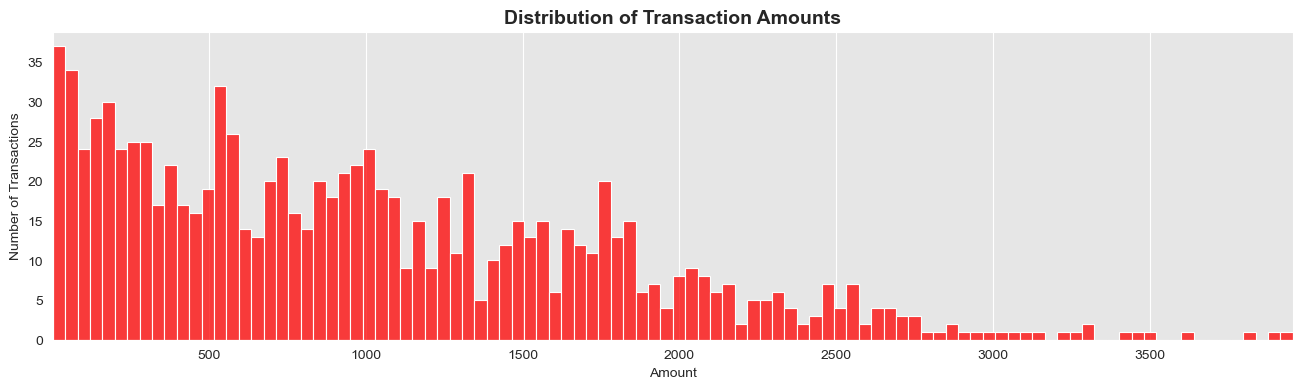

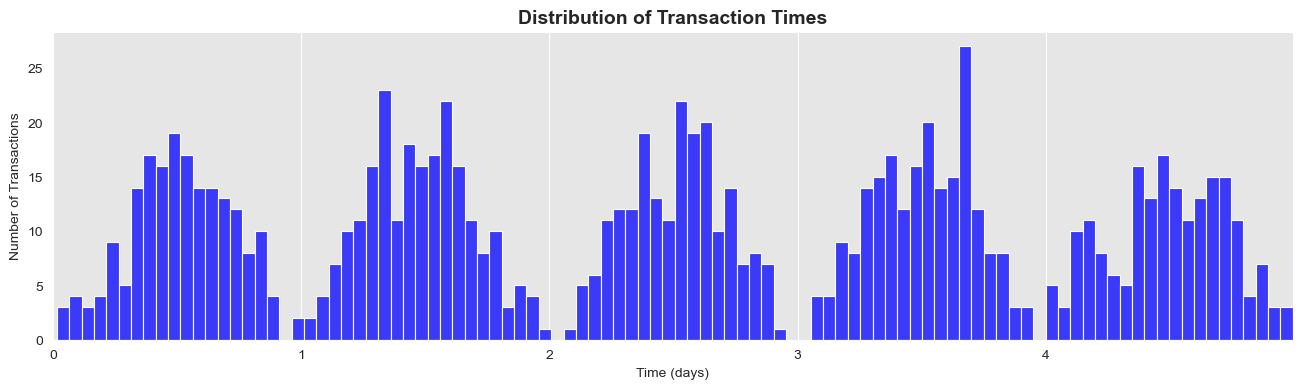

In [19]:
## Plotting Distribution of Transaction Amounts and Times

distribution_amount_fig, ax=plt.subplots(1, figsize=(16,4))

amount_val = transactions_df[transactions_df.tx_time_days<5]['tx_amount'].sample(n=1000).values

plt.grid(axis='y')

sns.histplot(data=amount_val, ax=ax, bins=100, color='red', kde=False)
plt.title('Distribution of Transaction Amounts', fontsize=14, weight='semibold')
plt.xlim([min(amount_val),max(amount_val)])
plt.xlabel("Amount")
plt.ylabel("Number of Transactions")

distribution_times_fig, ax=plt.subplots(1, figsize=(16,4))

time_val = transactions_df[transactions_df.tx_time_days<5]['tx_time_seconds'].sample(n=1000).values

plt.grid(axis='y')
# Divide the time variables by 86400 to transform seconds into days in the plot
sns.histplot(data=time_val/86400, ax=ax, color='blue', bins=100, kde=False)
plt.title('Distribution of Transaction Times', fontsize=14, weight='semibold')
plt.xlim([min(time_val/86400), max(time_val/86400)])
plt.xticks(range(5))
plt.xlabel("Time (days)")
plt.ylabel("Number of Transactions")

In [32]:
## Add Fraud Scenarios

def add_frauds(customer_profiles_table, terminal_profiles_table, transactions_df):
    
        # By default, all transactions are genuine
        transactions_df['TX_FRAUD']=0
        transactions_df['TX_FRAUD_SCENARIO']=0
        
        # Scenario 1
        # Registering possible fraud if the transaction amount is larger than X

        def score_tx_amount(amt_str):
                amount = float(amt_str)
                if amount < 500: return 0
                score = 0.1
                if amount > 1000: score += 0.1
                if amount > 2000: score += 0.2
                if amount > 3000: score += 0.2
                if amount > 4000: score += 0.3
                if amount > 5000: score += 0.3
                if amount > 6000: score += 0.4
                if amount > 7000: score += 0.4
                if amount > 8000: score += 0.4
                if amount > 9000: score += 0.5
                if amount > 10000: score += 0.5
                if amount > 11000: score += 0.5
                if amount > 12000: score += 0.6
                if amount > 13000: score += 0.6
                if amount > 14000: score += 0.6
                if amount > 15000: score += 0.7
                if amount > 16000: score += 0.7
                if amount > 17000: score += 0.7
                if amount > 18000: score += 0.8
                if amount > 19000: score += 0.8
                if amount > 20000: score += 0.8
                if amount > 21000: score += 0.9
                if amount > 22000: score += 0.9
                if amount > 23000: score += 0.9
                if amount > 24000: score += 1
                return score

        transactions_df['TX_FRAUD'] = transactions_df['tx_amount'].apply(score_tx_amount)
        transactions_df['TX_FRAUD_SCENARIO'] = transactions_df['TX_FRAUD']\
                .apply(lambda txf: 0 if txf == 0 else 1)

        nb_frauds_scenario_1 = transactions_df.TX_FRAUD.sum()
        print("Number of Frauds from scenario 1: "+str(nb_frauds_scenario_1))


        # Scenario 2
        # Registering possible fraud if criminal use of random terminals via phishing methods
        # Compromising a gas station terminal, online terminal, or other methods
        for day in range(transactions_df.tx_time_days.max()):

                compromised_terminals = terminal_profiles_table.terminal_id.sample(n=2, random_state=day)
                
                compromised_transactions = transactions_df[(transactions_df.tx_time_days>=day) &
                                                           (transactions_df.tx_time_days<day+28) &
                                                           (transactions_df.terminal_id.isin(compromised_terminals))]
                                        
                transactions_df.loc[compromised_transactions.index, 'TX_FRAUD'] += 1
                transactions_df.loc[compromised_transactions.index,'TX_FRAUD_SCENARIO'] = 2

        nb_frauds_scenario_2 = transactions_df.TX_FRAUD.sum()-nb_frauds_scenario_1
        print("Number of frauds from scenario 2: "+str(nb_frauds_scenario_2))

        # Scenario 3
        # Registering possible fraud if random customer has unusual transaction amounts
        # This scenario shows 1/3 of transactions' amounts multiplied by 5 over 14 days
        for day in range(transactions_df.tx_time_days.max()):
                
                compromised_customers = customer_profiles_table.customer_id.sample(n=3, random_state=day).values
                
                compromised_transactions = transactions_df[(transactions_df.tx_time_days>=day) &
                                                           (transactions_df.tx_time_days<day+14) &
                                                           (transactions_df.customer_id.isin(compromised_customers))]
                
                nb_compromised_transactions = len(compromised_transactions)
                
                random.seed(day)
                index_fauds = random.sample(list(compromised_transactions.index.values),
                                            k=int(nb_compromised_transactions/3))
                
                transactions_df.loc[index_fauds,'tx_amount'] = transactions_df.loc[index_fauds,
                                                                                   'tx_amount']*5
                transactions_df.loc[index_fauds,'TX_FRAUD'] += 2
                transactions_df.loc[index_fauds,'TX_FRAUD_SCENARIO'] = 3

        nb_frauds_scenario_3 = transactions_df.TX_FRAUD.sum()-nb_frauds_scenario_2-nb_frauds_scenario_1
        print("Number of frauds from scenario 3: "+str(nb_frauds_scenario_3))

        return transactions_df                 

In [33]:
## Add Fraud Transactions using these scenarios
%time transactions_df = add_frauds(customer_profiles_table, terminal_profiles_table, transactions_df)

Number of Frauds from scenario 1: 308408.9000000001
Number of frauds from scenario 2: 10517.000000000058
Number of frauds from scenario 3: 10772.000000000058
CPU times: total: 39.2 s
Wall time: 40.1 s


In [34]:
## Query for Transactions Registered as > Y possibility of Fraud
transactions_df.query('TX_FRAUD > 15')

,transaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days,TX_FRAUD,TX_FRAUD_SCENARIO
1633639,1633639,2024-02-07 07:17:50,3643,3462,120100.25,5901470,68,15.9,3
2139164,2139164,2024-02-28 09:02:55,2613,5953,123495.50,7722175,89,15.9,3


In [35]:
## Number of Fraud Transactions
transactions_df.TX_FRAUD.sum()

329697.9000000002

In [36]:
transactions_df.head()

,transaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2023-12-01 00:00:16,3714,7482,422.96,16,0,0.0,0
1,1,2023-12-01 00:01:28,4232,3374,765.62,88,0,0.1,1
2,2,2023-12-01 00:01:41,3887,1708,1006.72,101,0,0.2,1
3,3,2023-12-01 00:02:05,3620,2566,279.18,125,0,0.0,0
4,4,2023-12-01 00:02:10,4961,9526,1616.40,130,0,0.2,1


In [37]:
transactions_df.TX_FRAUD.mean()

0.1529038702966225

In [38]:
transactions_df[transactions_df.TX_FRAUD_SCENARIO==1].shape

(1430879, 9)

In [39]:
transactions_df[transactions_df.TX_FRAUD_SCENARIO==2].shape

(10459, 9)

In [40]:
transactions_df[transactions_df.TX_FRAUD_SCENARIO==3].shape

(5380, 9)

In [41]:
transactions_df

,transaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2023-12-01 00:00:16,3714,7482,422.96,16,0,0.0,0
1,1,2023-12-01 00:01:28,4232,3374,765.62,88,0,0.1,1
2,2,2023-12-01 00:01:41,3887,1708,1006.72,101,0,0.2,1
3,3,2023-12-01 00:02:05,3620,2566,279.18,125,0,0.0,0
4,4,2023-12-01 00:02:10,4961,9526,1616.40,130,0,0.2,1
...,...,...,...,...,...,...,...,...,...
2156238,2156238,2024-02-28 23:59:17,1554,2827,1981.67,7775957,89,0.2,1
2156239,2156239,2024-02-28 23:59:21,3940,1512,29.95,7775961,89,0.0,0
2156240,2156240,2024-02-28 23:59:26,409,1163,1493.31,7775966,89,0.2,1
2156241,2156241,2024-02-28 23:59:36,3466,5803,20.60,7775976,89,0.0,0


In [42]:
def get_stats(transactions_df):
    # Number of Transactions per Day
    nb_tx_per_day = transactions_df.groupby(['tx_time_days'])['customer_id'].count()
    # Number of Fraudulent Transactions per Day
    nb_fraud_per_day = transactions_df.groupby(['tx_time_days'])['TX_FRAUD'].sum()
    # Number of Fraudulent Cards per Day
    nb_fraudcard_per_day = transactions_df[transactions_df['TX_FRAUD']>0]\
        .groupby(['tx_time_days']).customer_id.nunique()
    
    return (nb_tx_per_day, nb_fraud_per_day, nb_fraudcard_per_day)

(nb_tx_per_day, nb_fraud_per_day, nb_fraudcard_per_day) = get_stats(transactions_df)

n_days = len(nb_tx_per_day)

tx_stats = pd.DataFrame({"value":pd.concat([nb_tx_per_day/50,
                                            nb_fraud_per_day,
                                            nb_fraudcard_per_day])})

tx_stats['stat_type'] = ["nb_tx_per_day"]*n_days+\
                       ["nb_fraud_per_day"]*n_days+\
                       ["nb_fraudcard_per_day"]*n_days

tx_stats = tx_stats.reset_index()

In [84]:
%%capture

sns.set(style='darkgrid')
sns.set(font_scale=1.4)

fraud_and_transactions_stats_fig = plt.gcf()

fraud_and_transactions_stats_fig.set_size_inches(16, 8)

sns_plot = sns.lineplot(x="tx_time_days", y="value", data=tx_stats, hue="stat_type",
                        hue_order=["nb_tx_per_day", "nb_fraud_per_day", "nb_fraudcard_per_day"],
                        legend=False)

sns_plot.set_title('Total Transactions, Number of Fraudulent Transactions \n \
    and Number of Compromised Cards per Day', fontsize=20)
sns_plot.set(xlabel = "Number of days since beginning of data generation",
            ylabel="Number")

sns_plot.set_ylim([0,5000])

labels_legend = ["# Transactions per Day (/50)",
                "# Fraudulent Transactions per Day",
                "# Fraudulent Cards per Day"]

sns_plot.legend(loc='upper left', labels=labels_legend,
                bbox_to_anchor=(1.05, 1), fontsize=15)

hands, labs = ax.get_legend_handles_labels()
plt.legend(handles=hands, labels=labels_legend)

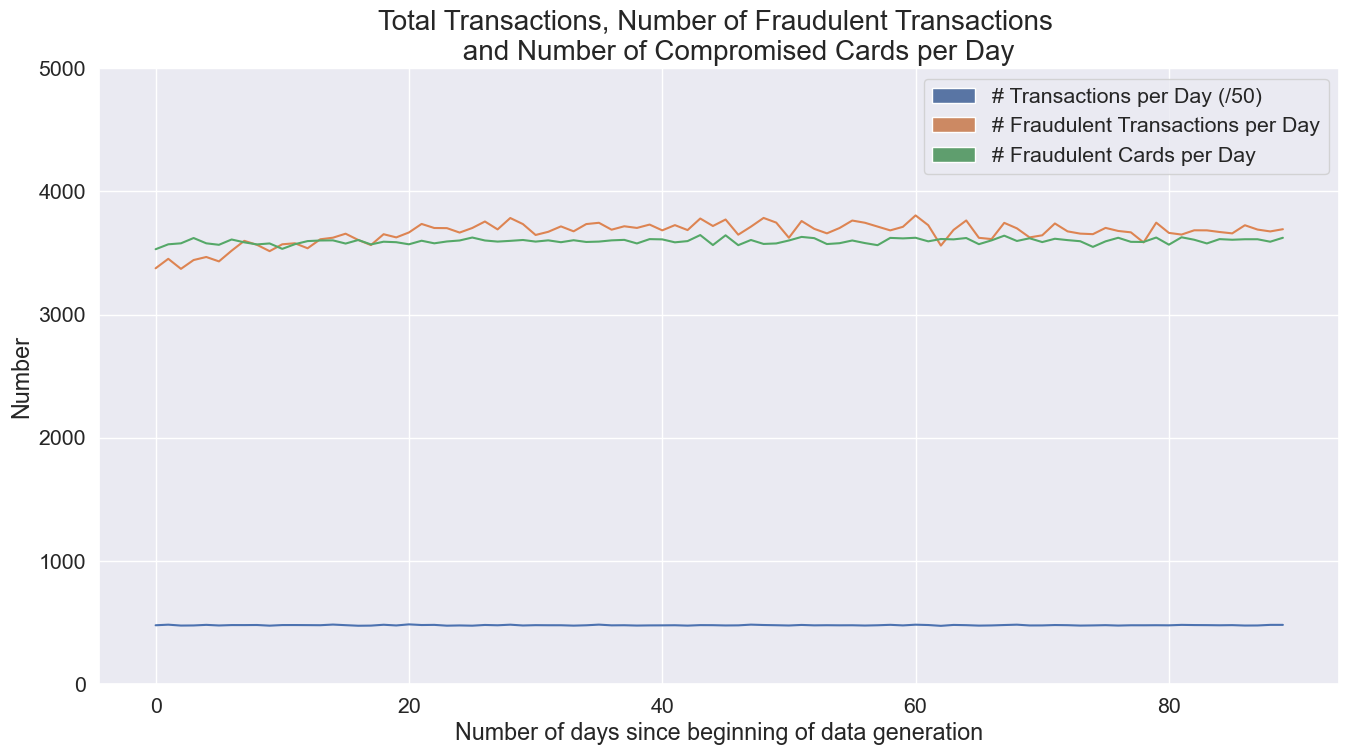

In [85]:
fraud_and_transactions_stats_fig # type: ignore

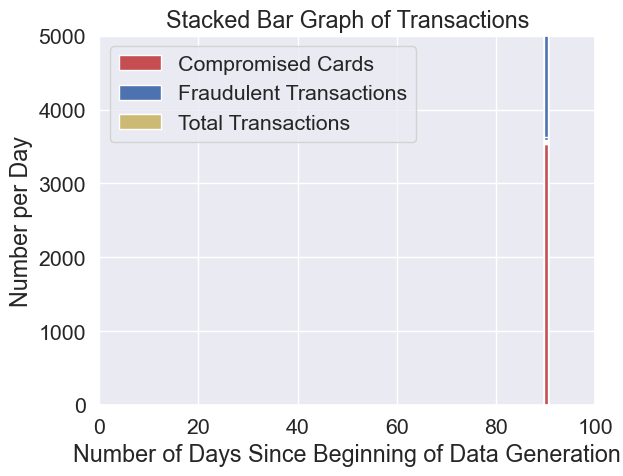

In [51]:
# plt.bar(n_days, nb_fraudcard_per_day, color='r')
# plt.bar(n_days, nb_fraud_per_day, bottom=nb_fraudcard_per_day, color='b')
# plt.bar(n_days, nb_tx_per_day, bottom=nb_fraudcard_per_day+nb_fraud_per_day, color='y')
# plt.xlabel("Number of Days Since Beginning of Data Generation")
# plt.ylabel("Number per Day")
# plt.xlim(0,100)
# plt.ylim(0,5000)
# plt.legend(["Compromised Cards", "Fraudulent Transactions", "Total Transactions"])
# plt.title("Stacked Bar Graph of Transactions")
# plt.show()

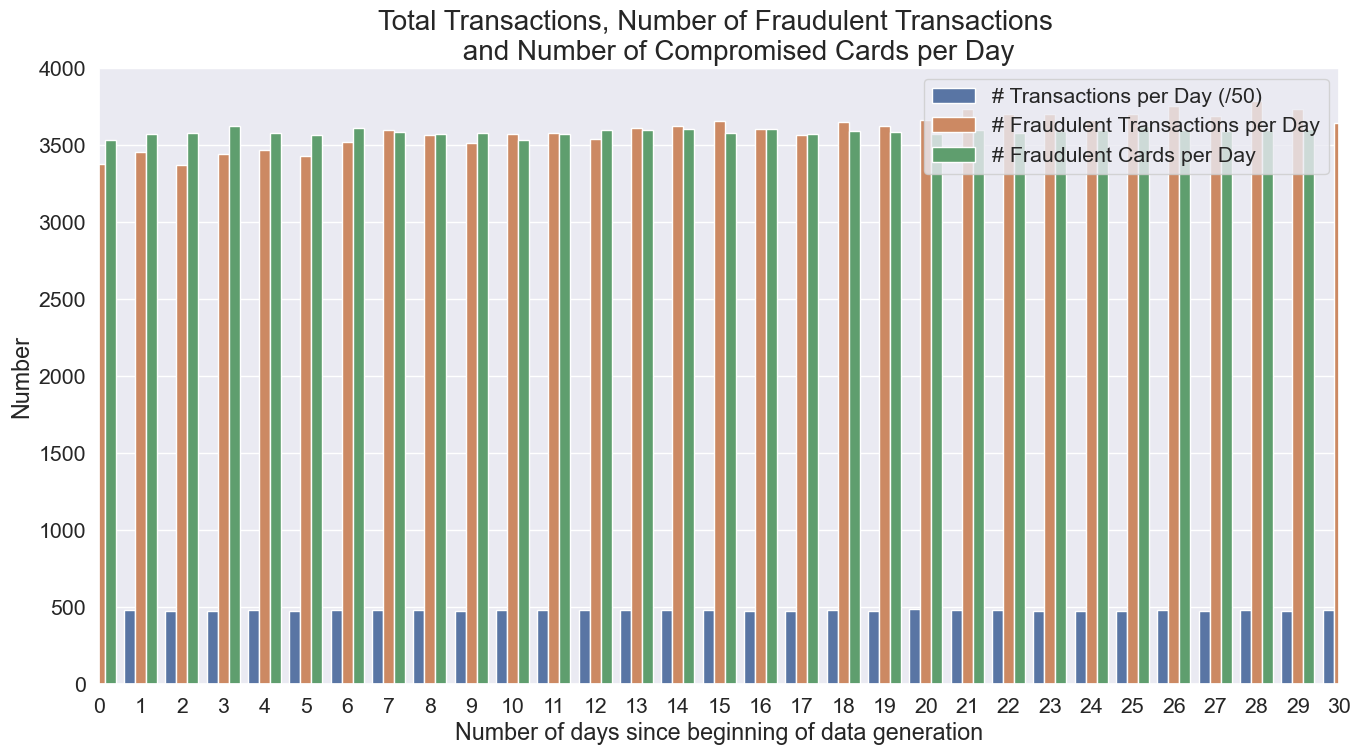

In [83]:
sns.set(style='darkgrid')
sns.set(font_scale=1.4)

fig, ax=plt.subplots(figsize=(16, 8))
sns_plot2 = sns.barplot(x="tx_time_days", y="value", data=tx_stats, hue="stat_type",
                        hue_order=["nb_tx_per_day", "nb_fraud_per_day", "nb_fraudcard_per_day"])
sns_plot2.set_title('Total Transactions, Number of Fraudulent Transactions \n \
    and Number of Compromised Cards per Day', fontsize=20)
sns_plot2.set(xlabel = "Number of days since beginning of data generation",
            ylabel="Number")

sns_plot2.set_xlim([0,30])
sns_plot2.set_ylim([0,4000])

labels_legend = ["# Transactions per Day (/50)",
                "# Fraudulent Transactions per Day",
                "# Fraudulent Cards per Day"]

sns_plot2.legend(loc='upper left', labels=labels_legend,
                bbox_to_anchor=(1.05, 1), fontsize=15)

hands, labs = ax.get_legend_handles_labels()
plt.legend(handles=hands, labels=labels_legend)

plt.show()

In [43]:
dir_output = "./simulated-data-raw/"

if not os.path.exists(dir_output):
    os.makedirs(dir_output)

start_date = datetime.datetime.strptime("2023-12-01", "%Y-%m-%d")

for day in range(transactions_df.tx_time_days.max()+1):
    
    transactions_day = transactions_df[transactions_df.tx_time_days==day]\
        .sort_values('tx_time_seconds')
    date = start_date + datetime.timedelta(days=day)
    filename_output = date.strftime("%Y-%m-%d")+'.pkl'
    
    # Protocol=4 required for Google Colab
    transactions_day.to_pickle(dir_output+filename_output, protocol=4)

In [109]:
# Take an intial fraction of data as sample & create new dataframe
sample_df1 = transactions_df.sample(frac=0.01)

# From new dataframe, take another fractional sampling to use for export
sample_df2 = sample_df1.sample(frac=0.1)

In [110]:
sample_df2

,transaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days,TX_FRAUD,TX_FRAUD_SCENARIO
705082,705082,2023-12-30 10:43:53,67,9297,2772.05,2544233,29,0.4,1
1085947,1085947,2024-01-15 09:30:46,2699,1288,2938.44,3922246,45,0.4,1
1853013,1853013,2024-02-16 09:58:40,4209,5983,285.75,6688720,77,0.0,0
434951,434951,2023-12-19 06:29:28,2130,1039,998.06,1578568,18,0.1,1
923240,923240,2024-01-08 12:16:06,198,7340,2092.88,3327366,38,0.4,1
...,...,...,...,...,...,...,...,...,...
535112,535112,2023-12-23 09:19:11,2988,2181,129.74,1934351,22,0.0,0
932548,932548,2024-01-08 19:02:18,1544,5826,255.94,3351738,38,0.0,0
1943221,1943221,2024-02-20 05:42:57,4278,3545,522.75,7018977,81,0.1,1
948083,948083,2024-01-09 12:43:32,4251,6838,556.44,3415412,39,0.1,1


In [111]:
# Query Sample Dataframe to ensure it shows a variety
sample_df2.query('TX_FRAUD > 9')

,transaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days,TX_FRAUD,TX_FRAUD_SCENARIO
2038262,2038262,2024-02-24 04:29:55,1948,1778,89895.5,7360195,85,9.8,3


In [112]:
# Export Dataframe to CSV file in notebook directory
sample_df2.to_csv('SampleData.csv')

# Export Dataframe to Excel on Specified Sheet
sample_df2.to_excel('SampleData.xlsx', 
                    sheet_name='SampleData1')